<a href="https://colab.research.google.com/github/rahelitapasaribu/asah-MLcourse/blob/main/%5BKlasifikasi%5D_Submission_Akhir_BMLP_Rahelita_Pasaribu.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Penting**
- Jangan mengubah atau menambahkan cell text yang sudah disediakan, Anda hanya perlu mengerjakan cell code yang sudah disediakan.
- Pastikan seluruh kriteria memiliki output yang sesuai, karena jika tidak ada output dianggap tidak selesai.
- Misal, Anda menggunakan df = df.dropna() silakan gunakan df.isnull().sum() sebagai tanda sudah berhasil. Silakan sesuaikan seluruh output dengan perintah yang sudah disediakan.
- Pastikan Anda melakukan Run All sebelum mengirimkan submission untuk memastikan seluruh cell berjalan dengan baik.
- Pastikan Anda menggunakan variabel df dari awal sampai akhir dan tidak diperbolehkan mengganti nama variabel tersebut.
- Hapus simbol pagar (#) pada kode yang bertipe komentar jika Anda menerapkan kriteria tambahan
- Biarkan simbol pagar (#) jika Anda tidak menerapkan kriteria tambahan
- Pastikan Anda mengerjakan sesuai section yang sudah diberikan tanpa mengubah judul atau header yang disediakan.

# **1. Import Library**
Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [26]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import matplotlib

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report, confusion_matrix

import joblib

# **2. Memuat Dataset dari Hasil Clustering**
Memuat dataset hasil clustering dari file CSV ke dalam variabel DataFrame.

In [27]:
df = pd.read_csv("data_clustering_inverse.csv")

In [28]:
df.head()

,TransactionAmount,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,TransactionAmount_Binned,CustomerAge_Binned,Target
0,14.09,Debit,San Diego,ATM,70.0,Doctor,81.0,1.0,5112.21,1,0,1
1,376.24,Debit,Houston,ATM,68.0,Doctor,141.0,1.0,13758.91,2,0,2
2,126.29,Debit,Mesa,Online,19.0,Student,56.0,1.0,1122.35,1,0,3
3,184.50,Debit,Raleigh,Online,26.0,Student,25.0,1.0,8569.06,1,0,1
4,92.15,Debit,Oklahoma City,ATM,18.0,Student,172.0,1.0,781.68,1,1,3


# **3. Data Splitting**
Tahap Data Splitting bertujuan untuk memisahkan dataset menjadi dua bagian: data latih (training set) dan data uji (test set).

In [29]:
X = df.drop('Target', axis=1)
y = df['Target']

categorical_cols = X.select_dtypes(include=['object']).columns

if len(categorical_cols) > 0:
    from sklearn.preprocessing import LabelEncoder
    encoders = {}
    for col in categorical_cols:
        le = LabelEncoder()
        X[col] = le.fit_transform(X[col])
        encoders[col] = le

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Size training set: {X_train.shape}")
print(f"Size testing set: {X_test.shape}")
print(f"Target Distribusi:\n{y_train.value_counts()}")

Size training set: (1917, 11)
Size testing set: (480, 11)
Target Distribusi:
Target
3    691
1    679
2    302
0    245
Name: count, dtype: int64


# **4. Membangun Model Klasifikasi**
Setelah memilih algoritma klasifikasi yang sesuai, langkah selanjutnya adalah melatih model menggunakan data latih.

Berikut adalah rekomendasi tahapannya.
1. Menggunakan algoritma klasifikasi yaitu Decision Tree.
2. Latih model menggunakan data yang sudah dipisah.

In [30]:
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

y_pred_dt = dt_model.predict(X_test)

print("=== PERFORMA DECISION TREE ===")
print(f"Akurasi: {accuracy_score(y_test, y_pred_dt):.4f}")
print(f"Presisi: {precision_score(y_test, y_pred_dt, average='weighted'):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_dt, average='weighted'):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred_dt, average='weighted'):.4f}")

=== PERFORMA DECISION TREE ===
Akurasi: 0.9917
Presisi: 0.9917
Recall: 0.9917
F1-Score: 0.9916


In [31]:
joblib.dump(dt_model, 'decision_tree_model.h5')

['decision_tree_model.h5']

# **5. Memenuhi Kriteria Skilled dan Advanced dalam Membangun Model Klasifikasi**



**Biarkan kosong jika tidak menerapkan kriteria skilled atau advanced**

In [32]:
models = {}
results = []

print("Training Random Forest✅")
rf_model = RandomForestClassifier(random_state=42, n_estimators=100)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

print("Training Gradient Boosting✅")
gb_model = GradientBoostingClassifier(random_state=42, n_estimators=100)
gb_model.fit(X_train, y_train)
y_pred_gb = gb_model.predict(X_test)

print("Training K-Nearest Neighbors✅")
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)


Training Random Forest✅
Training Gradient Boosting✅
Training K-Nearest Neighbors✅



=== PERBANDINGAN MODEL ===
              Model  Akurasi  Presisi   Recall  F1-Score
      Decision Tree 0.991667 0.991683 0.991667  0.991635
      Random Forest 0.985417 0.985470 0.985417  0.985387
  Gradient Boosting 0.989583 0.989672 0.989583  0.989565
K-Nearest Neighbors 0.985417 0.985383 0.985417  0.985389


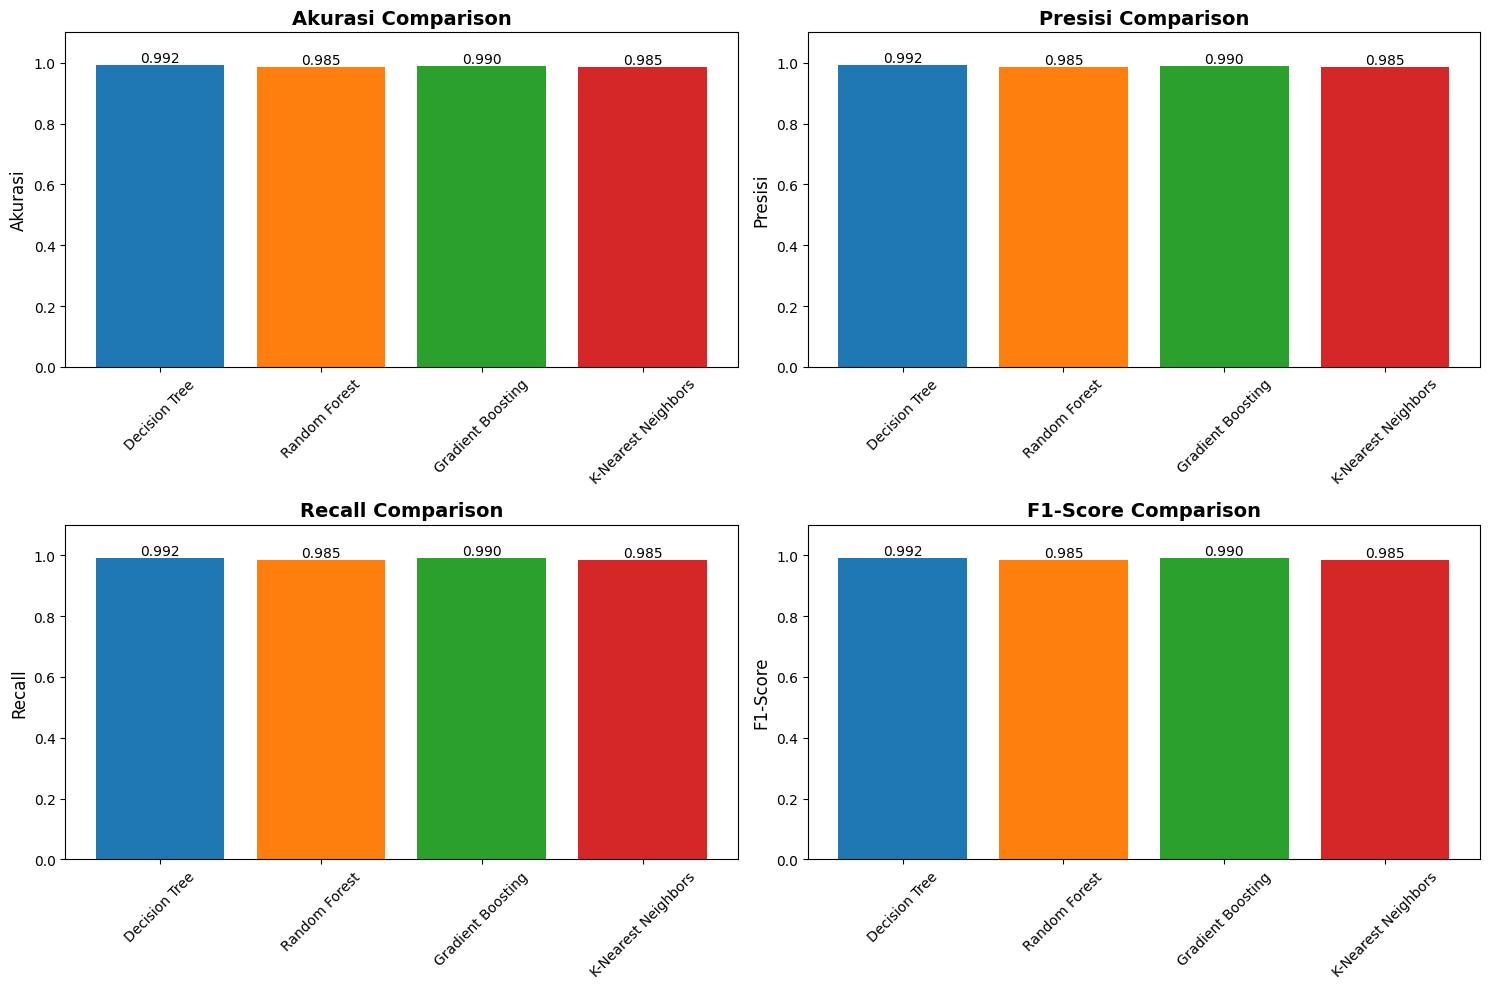

In [33]:
dt_metrics = {
    'Model': 'Decision Tree',
    'Akurasi': accuracy_score(y_test, y_pred_dt),
    'Presisi': precision_score(y_test, y_pred_dt, average='weighted'),
    'Recall': recall_score(y_test, y_pred_dt, average='weighted'),
    'F1-Score': f1_score(y_test, y_pred_dt, average='weighted')
}
results.append(dt_metrics)

rf_metrics = {
    'Model': 'Random Forest',
    'Akurasi': accuracy_score(y_test, y_pred_rf),
    'Presisi': precision_score(y_test, y_pred_rf, average='weighted'),
    'Recall': recall_score(y_test, y_pred_rf, average='weighted'),
    'F1-Score': f1_score(y_test, y_pred_rf, average='weighted')
}
results.append(rf_metrics)
models['Random Forest'] = rf_model

gb_metrics = {
    'Model': 'Gradient Boosting',
    'Akurasi': accuracy_score(y_test, y_pred_gb),
    'Presisi': precision_score(y_test, y_pred_gb, average='weighted'),
    'Recall': recall_score(y_test, y_pred_gb, average='weighted'),
    'F1-Score': f1_score(y_test, y_pred_gb, average='weighted')
}
results.append(gb_metrics)
models['Gradient Boosting'] = gb_model

knn_metrics = {
    'Model': 'K-Nearest Neighbors',
    'Akurasi': accuracy_score(y_test, y_pred_knn),
    'Presisi': precision_score(y_test, y_pred_knn, average='weighted'),
    'Recall': recall_score(y_test, y_pred_knn, average='weighted'),
    'F1-Score': f1_score(y_test, y_pred_knn, average='weighted')
}
results.append(knn_metrics)
models['KNN'] = knn_model

results_df = pd.DataFrame(results)
print("\n=== PERBANDINGAN MODEL ===")
print(results_df.to_string(index=False))

fig, axes = plt.subplots(2, 2, figsize=(15, 10))
metrics_list = ['Akurasi', 'Presisi', 'Recall', 'F1-Score']

for idx, metric in enumerate(metrics_list):
    row = idx // 2
    col = idx % 2
    ax = axes[row, col]
    values = results_df[metric].values
    models_names = results_df['Model'].values

    bars = ax.bar(models_names, values, color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728'])
    ax.set_ylabel(metric, fontsize=12)
    ax.set_title(f'{metric} Comparison', fontsize=14, fontweight='bold')
    ax.set_ylim([0, 1.1])

    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.3f}',
                ha='center', va='bottom', fontsize=10)

    ax.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

In [34]:
joblib.dump(rf_model, 'explore_RandomForest_classification.h5')
joblib.dump(gb_model, 'explore_GradientBoosting_classification.h5')
joblib.dump(knn_model, 'explore_KNN_classification.h5')
print("Semua model explore berhasil disimpan")


Semua model explore berhasil disimpan


Hyperparameter Tuning Model

Pilih salah satu algoritma yang ingin Anda tuning

In [35]:
print("Hyperparameter Tuning Random Forest")
param_grid = {
    'n_estimators': [50, 100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)
grid_search.fit(X_train, y_train)
print(f"Parameter terbaik: {grid_search.best_params_}")
print(f"Score cross validation terbaik: {grid_search.best_score_:.4f}")

tuned_rf_model = grid_search.best_estimator_
y_pred_tuned_rf = tuned_rf_model.predict(X_test)

Hyperparameter Tuning Random Forest
Fitting 5 folds for each of 144 candidates, totalling 720 fits
Parameter terbaik: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Score cross validation terbaik: 0.9838


Performa Random Forest Setelah Tuning
Akurasi: 0.9875
Presisi: 0.9875
Recall: 0.9875
F1-Score: 0.9875

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.97      0.98        61
           1       0.98      0.99      0.99       170
           2       0.97      0.97      0.97        76
           3       0.99      1.00      1.00       173

    accuracy                           0.99       480
   macro avg       0.99      0.98      0.98       480
weighted avg       0.99      0.99      0.99       480



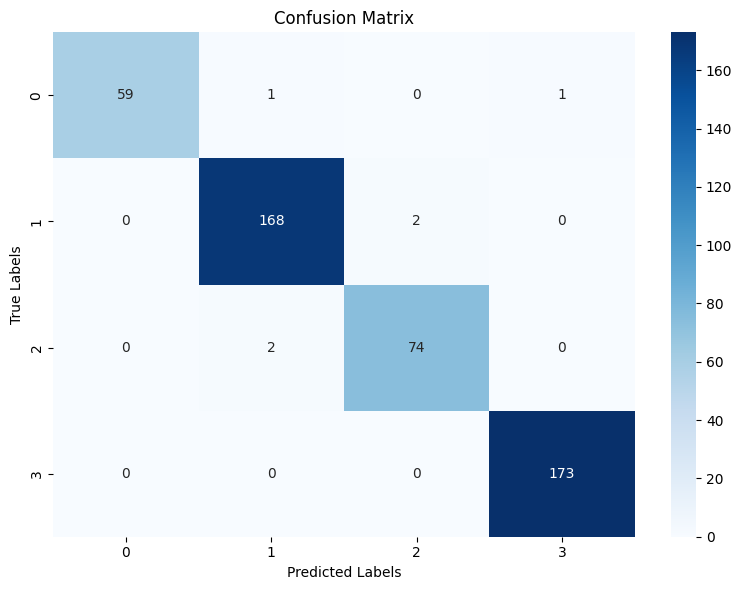

In [36]:
print("Performa Random Forest Setelah Tuning")
akurasi_tuned_rf = accuracy_score(y_test, y_pred_tuned_rf)
presisi_tuned_rf = precision_score(y_test, y_pred_tuned_rf, average='weighted')
recall_tuned_rf = recall_score(y_test, y_pred_tuned_rf, average='weighted')
f1_score_tuned_rf = f1_score(y_test, y_pred_tuned_rf, average='weighted')

print(f"Akurasi: {akurasi_tuned_rf:.4f}")
print(f"Presisi: {presisi_tuned_rf:.4f}")
print(f"Recall: {recall_tuned_rf:.4f}")
print(f"F1-Score: {f1_score_tuned_rf:.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred_tuned_rf))

cm = confusion_matrix(y_test, y_pred_tuned_rf)
cm_df = pd.DataFrame(cm, index=tuned_rf_model.classes_, columns=tuned_rf_model.classes_)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.tight_layout()
plt.show()

In [37]:
joblib.dump(tuned_rf_model, 'tuning_classification.h5')

['tuning_classification.h5']

End of Code